In [1]:
# Import Libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings

In [2]:
df = pd.read_csv("Data file.csv")

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.shape

(209593, 37)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
# Check all the info related to our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

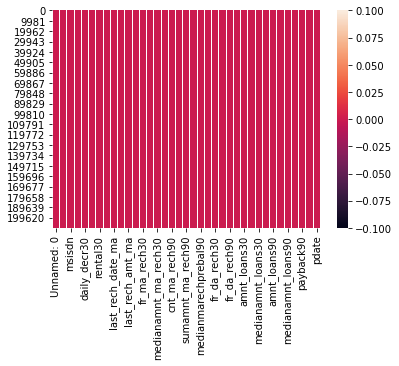

In [9]:
sb.heatmap(df.isnull())

In [10]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

visualization

In [11]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

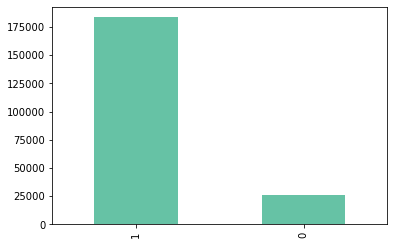

In [12]:
df['label'].value_counts().plot.bar(cmap='Set2')

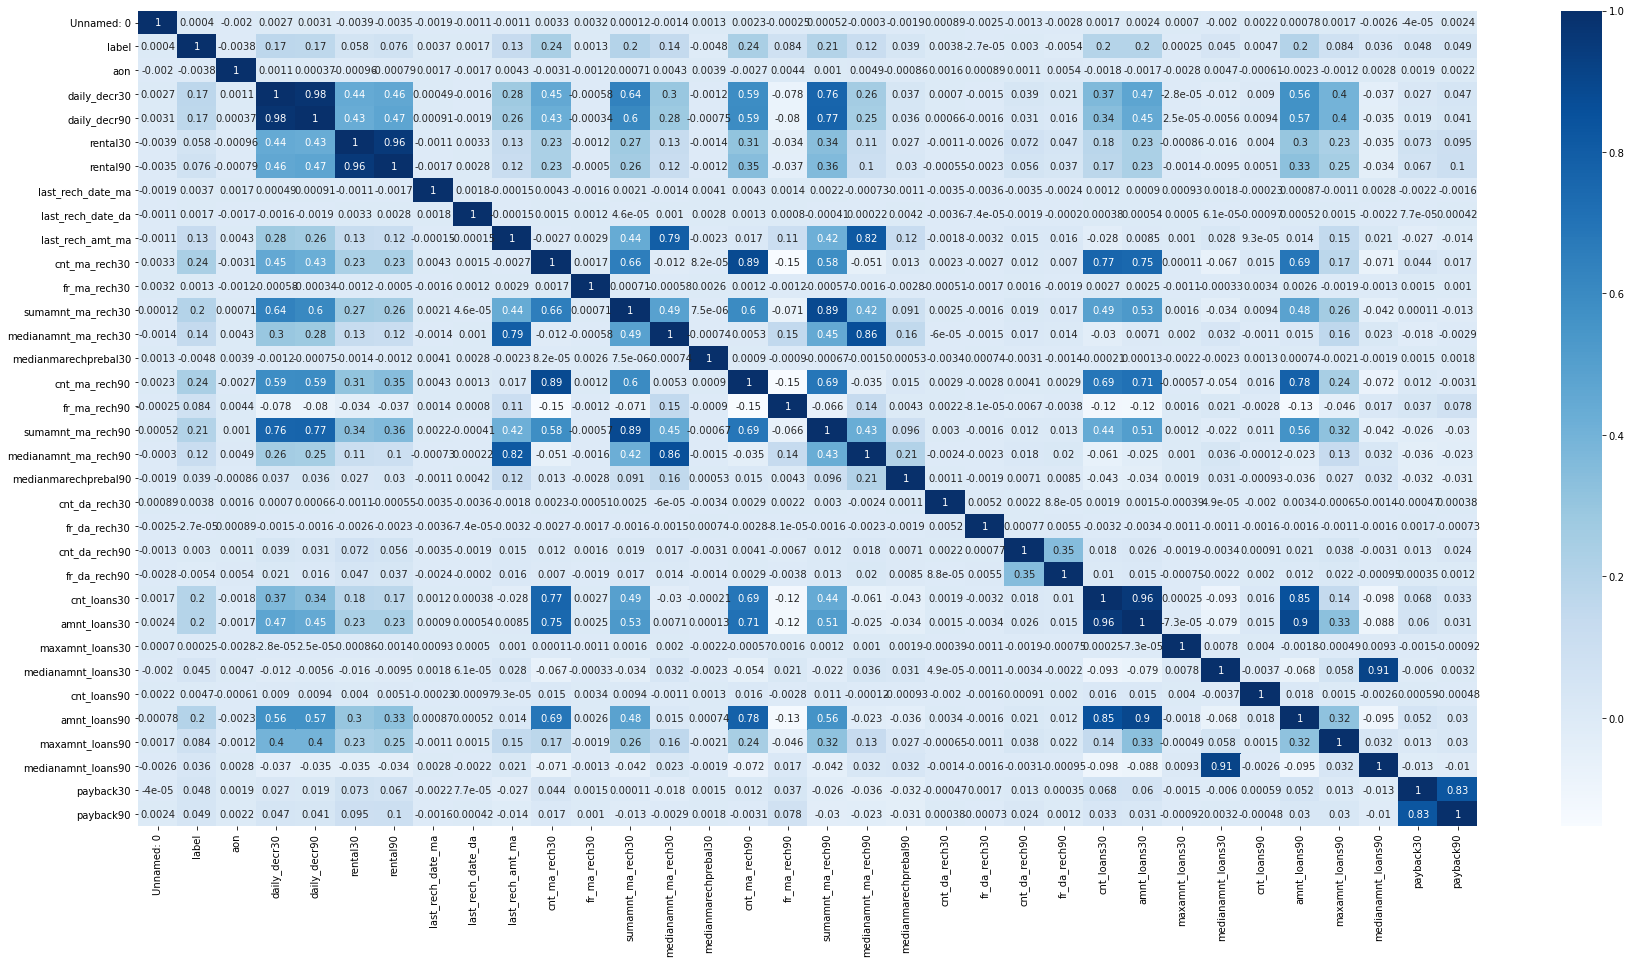

In [13]:
#Check correlation
fig=plt.figure(figsize=(30,15))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

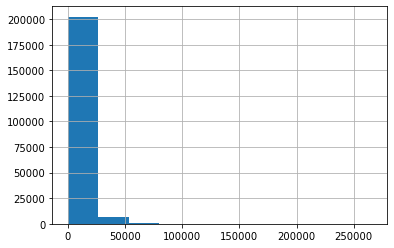

In [14]:
df['daily_decr30'].hist()

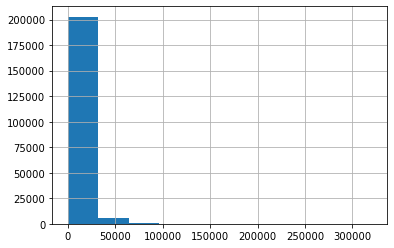

In [15]:
df['daily_decr90'].hist()

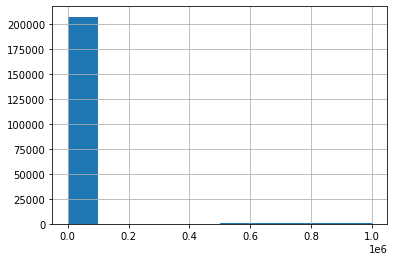

In [16]:
df['aon'].hist()

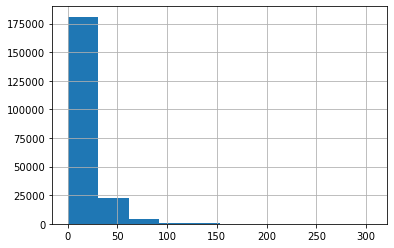

In [17]:
df['amnt_loans30'].hist()

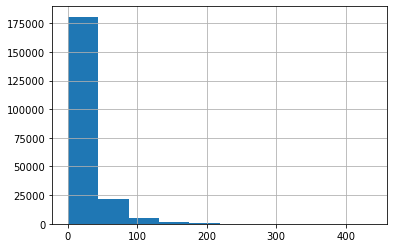

In [18]:
df['amnt_loans90'].hist()

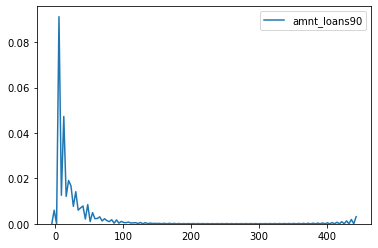

In [19]:
sb.kdeplot(df['amnt_loans90'])

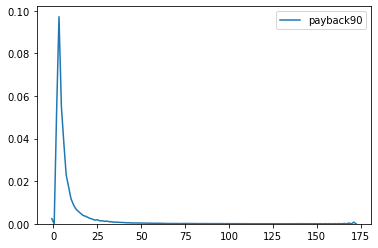

In [20]:
sb.kdeplot(df['payback90'])

In [21]:
# now we will slipt pdate column into three diff column day, month, year
df['year'] = pd.DatetimeIndex(df['pdate']).year
df['month'] = pd.DatetimeIndex(df['pdate']).month
df['day'] = pd.DatetimeIndex(df['pdate']).day

In [22]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle       pdate  year  month  day  
0      UPW  2016-07-20  2016      7   20  
1      UPW  2016-08-10  2016      8   10  
2      UPW  2016-08-19  2016      8   19  
3      UPW  2016-06-06  2016      6    6  
4      UPW  2016-06-22  2016      6   22  

[5 rows x 40 columns]

In [23]:
#we will drop pdate column
df.drop(['pdate'],axis=1,inplace = True)

In [24]:
# we will drop unamed column
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [25]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  cnt_loans90  \
0                2.0                0.0              1539  ...          2.0   
1               20.0                0.0              5787  ...          1.0   
2                3.0                0.0              1539  ...          1.0   
3               41.0                0.0               947  ...          2.0   
4                4.0                0.0              2309  ...          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  year  month  day  
0      UPW  2016      7   20  
1      UPW  2016      8   10  
2      UPW  2016      8   19  
3      UPW  2016      6    6  
4      UPW  2016      6   22  

[5 rows x 38 columns]

In [26]:
df.msisdn.head()

0    21408I70789
1    76462I70374
2    17943I70372
3    55773I70781
4    03813I82730
Name: msisdn, dtype: object

In [27]:
# we will drop msisdn column 
df.drop(['msisdn'],axis=1,inplace = True)

In [28]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  pcircle  year  month  day  
0  29.000000      UPW  2016      7   20  
1   0.000000      UPW  2016      8   10  
2   0.000000      UPW  2016      8   19  
3   0.000000      UPW  2016      6    6  
4   2.333333      UPW  2016      6   22  

[5 rows x 37 columns]

In [29]:
df['last_rech_date_da'].value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
635922.630667         1
684933.969169         1
779774.580500         1
627095.756936         1
508947.450202         1
Name: last_rech_date_da, Length: 1174, dtype: int64

In [30]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [31]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df['pcircle']=df['pcircle'].apply(lambda x : 1 if x=='UPW' else 0)

In [34]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  pcircle  year  month  day  
0  29.000000        1  2016      7   20  
1   0.000000        1  2016      8   10  
2   0.000000        1  2016      8   19  
3   0.000000        1  2016      6    6  
4   2.333333        1  2016      6   22  

[5 rows x 37 columns]

In [35]:
for i in df.columns:
    df[i]= df[i].astype(float)

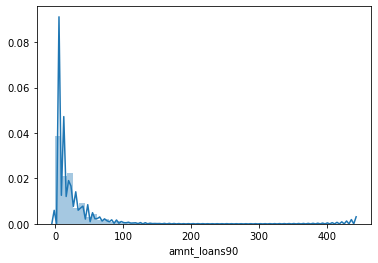

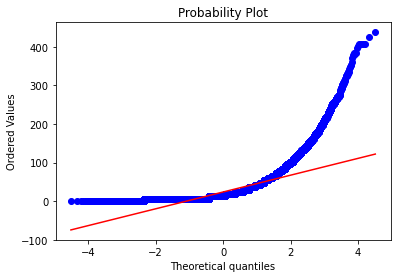

In [36]:
#histogram and normal probability plot
sb.distplot(df['amnt_loans90'])
fig = plt.figure()
res = stats.probplot(df['amnt_loans90'], plot=plt)

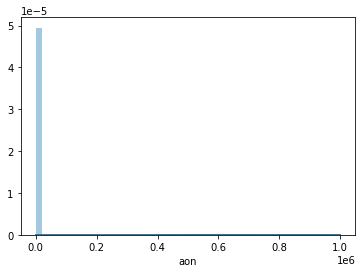

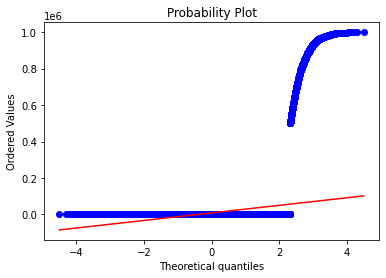

In [37]:
#histogram and normal probability plot
sb.distplot(df['aon'])
fig = plt.figure()
res = stats.probplot(df['aon'], plot=plt)

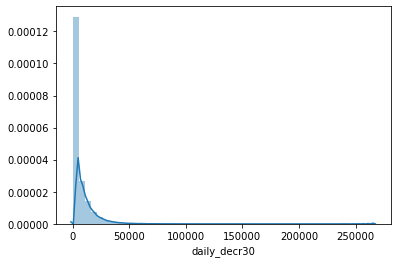

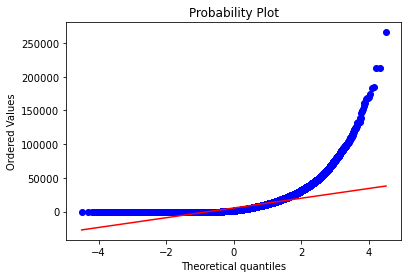

In [38]:
#histogram and normal probability plot
sb.distplot(df['daily_decr30'])
fig = plt.figure()
res = stats.probplot(df['daily_decr30'], plot=plt)

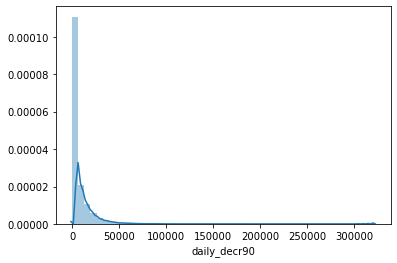

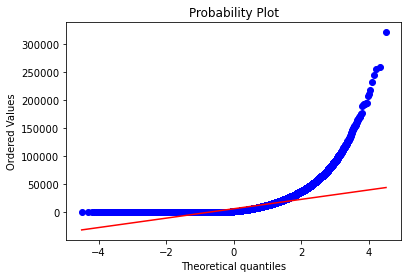

In [39]:
#histogram and normal probability plot
sb.distplot(df['daily_decr90'])
fig = plt.figure()
res = stats.probplot(df['daily_decr90'], plot=plt)

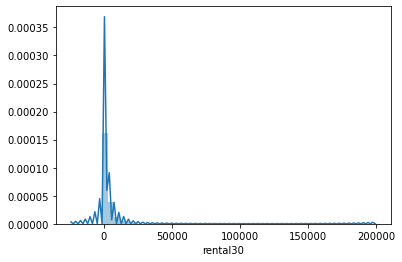

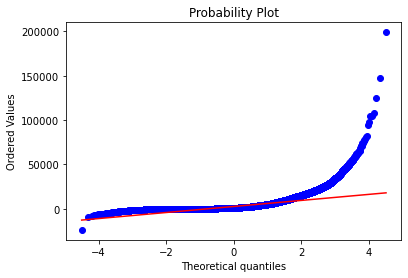

In [40]:
#histogram and normal probability plot
sb.distplot(df['rental30'])
fig = plt.figure()
res = stats.probplot(df['rental30'], plot=plt)

<ipython-input-41-051a05ecb98f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-41-051a05ecb98f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-41-051a05ecb98f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-41-051a05e

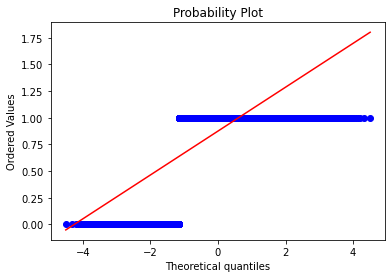

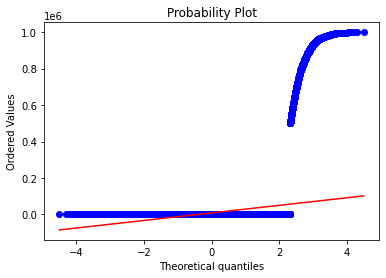

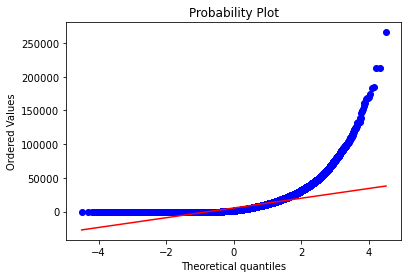

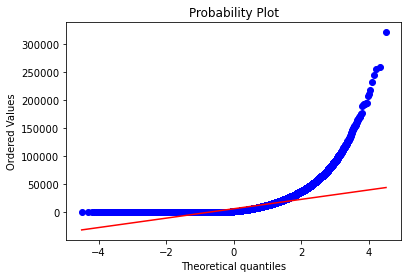

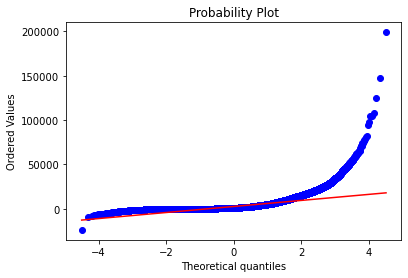

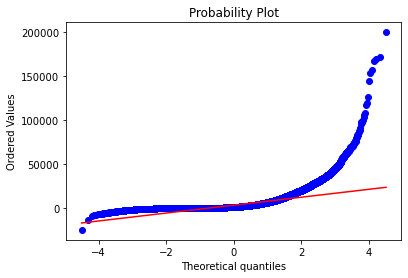

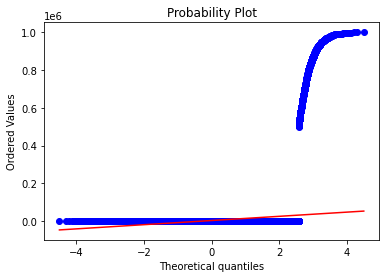

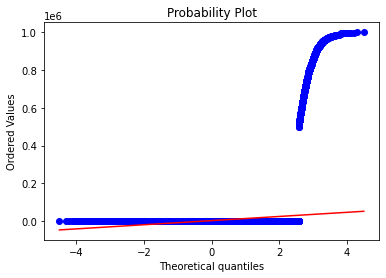

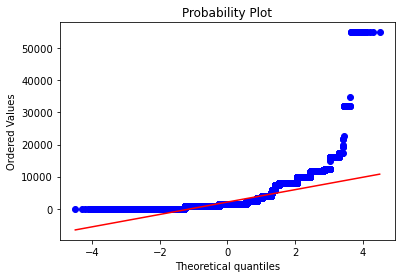

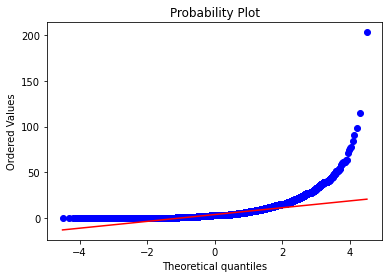

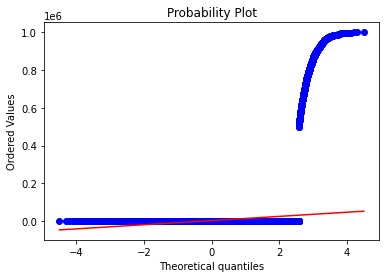

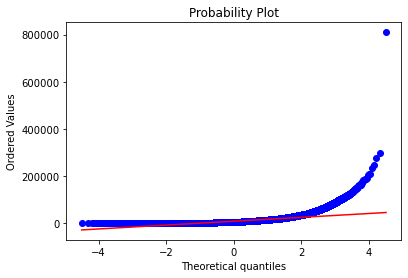

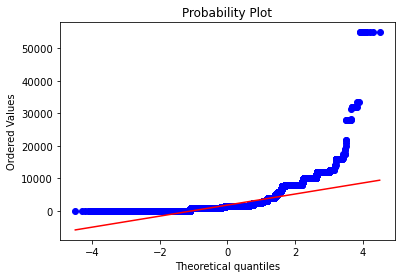

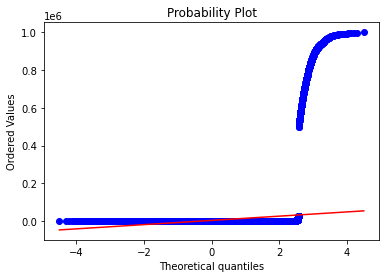

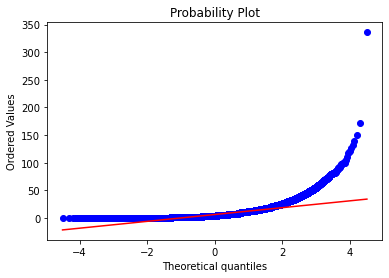

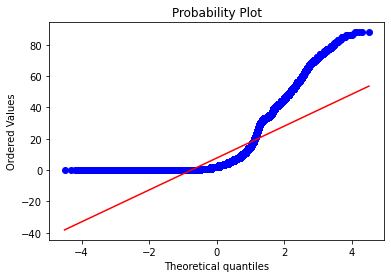

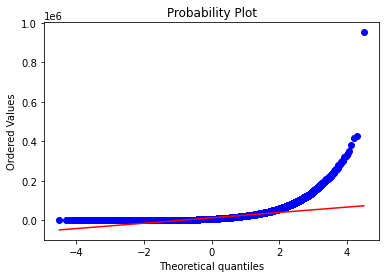

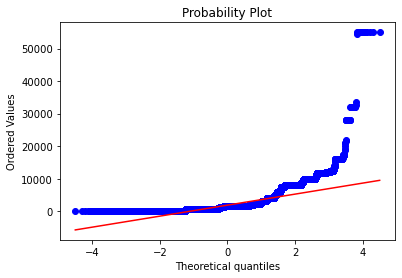

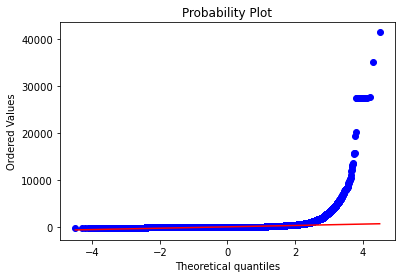

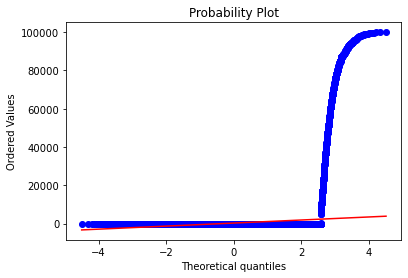

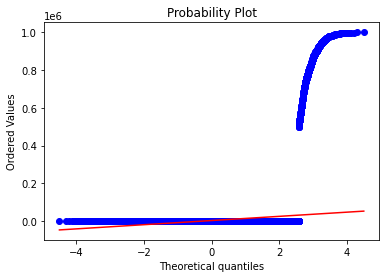

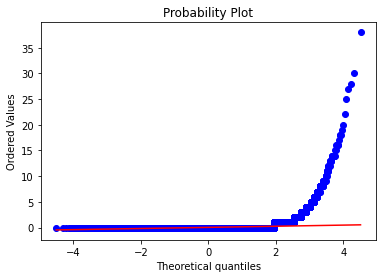

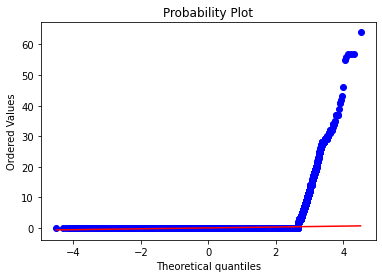

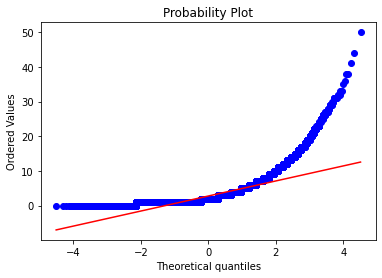

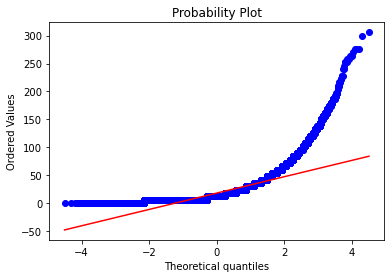

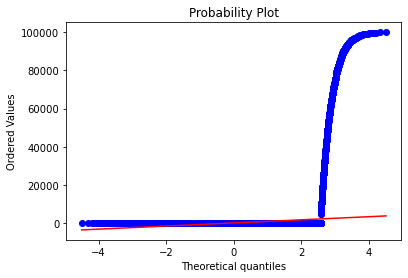

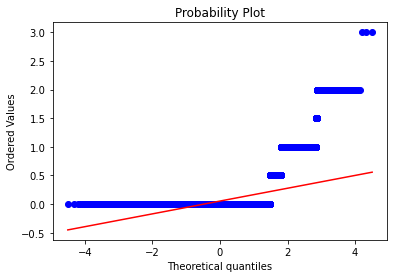

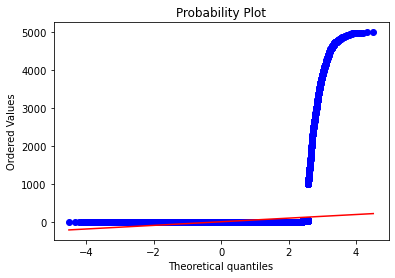

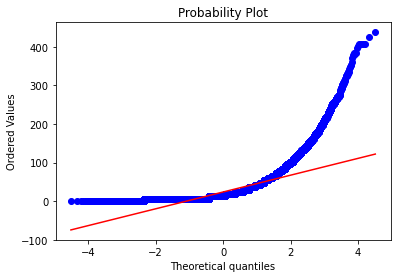

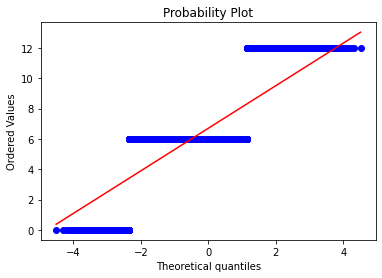

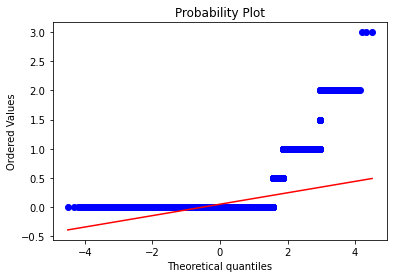

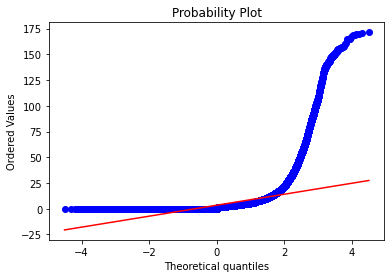

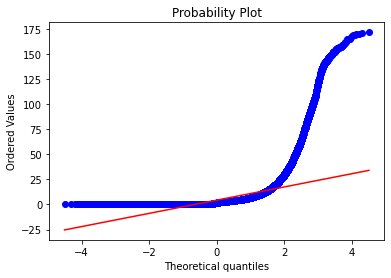

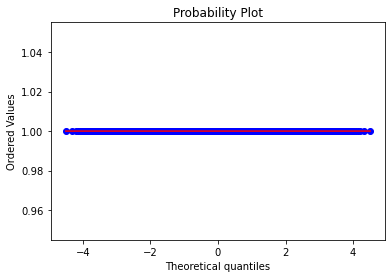

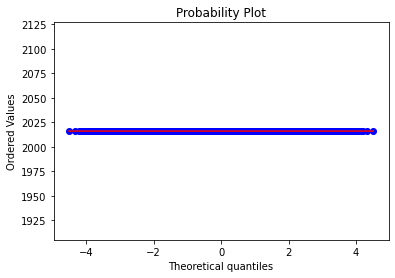

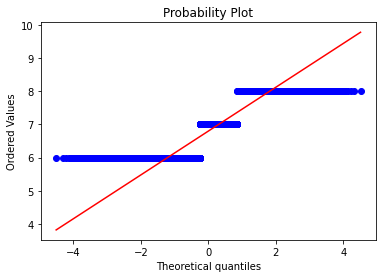

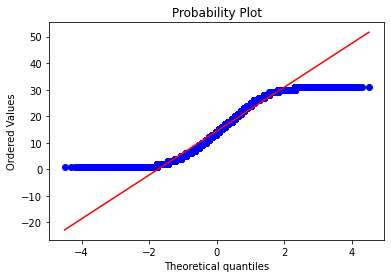

In [41]:
col = df.columns.values
for i in range(0,len(col)):
    fig = plt.figure()
    res = stats.probplot(df[col[i]], plot=plt)

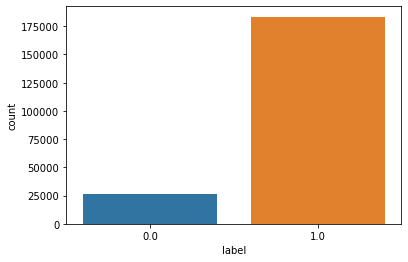

In [42]:
#lest chek proportion each type of notes in db
sb.countplot(x='label',data=df)
plt.show()

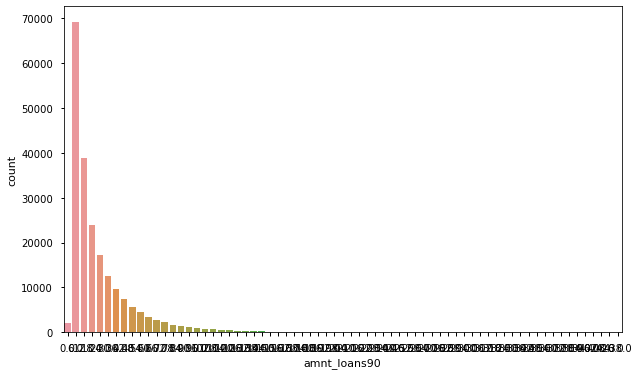

In [43]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='amnt_loans90',data=df)
plt.show()

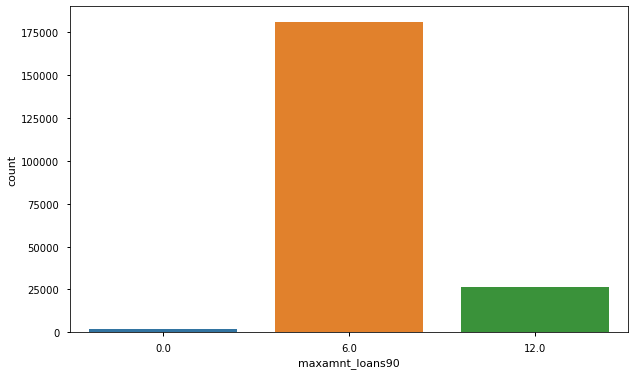

In [44]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='maxamnt_loans90',data=df)
plt.show()

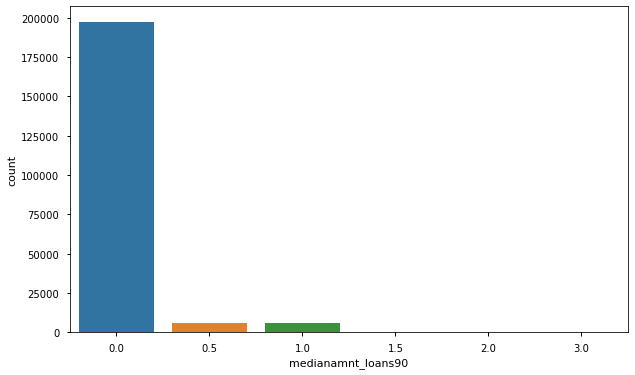

In [45]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='medianamnt_loans90',data=df)
plt.show()

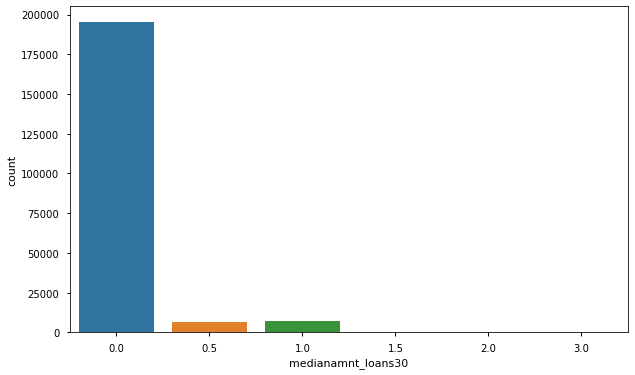

In [46]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='medianamnt_loans30',data=df)
plt.show()

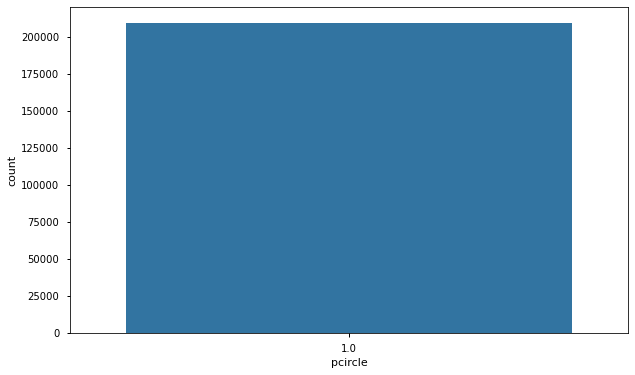

In [47]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='pcircle',data=df)
plt.show()

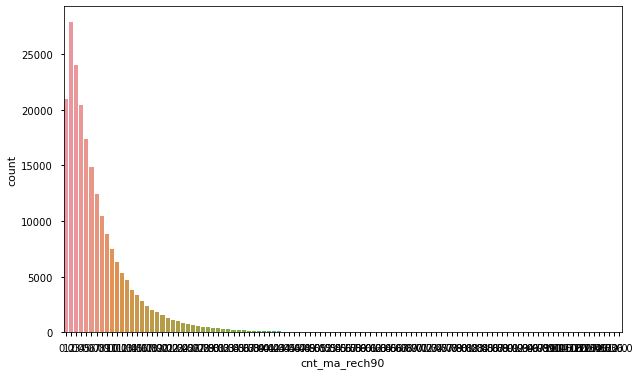

In [48]:
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(10,6))
sb.countplot(x='cnt_ma_rech90',data=df)
plt.show()

In [49]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0    0.0  272.0   3055.050000   3065.150000    220.13    260.13   
1    1.0  712.0  12122.000000  12124.750000   3691.26   3691.26   
2    1.0  535.0   1398.000000   1398.000000    900.13    900.13   
3    1.0  241.0     21.228000     21.228000    159.42    159.42   
4    1.0  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0            1539.0            2.0  ...   
1               20.0                0.0            5787.0            1.0  ...   
2                3.0                0.0            1539.0            1.0  ...   
3               41.0                0.0             947.0            0.0  ...   
4                4.0                0.0            2309.0            7.0  ...   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0          12.0              6.0                 0.0  29.000000   
1          1.0          12.0             12.0                 0.0   0.000000   
2          1.0           6.0              6.0                 0.0   0.000000   
3          2.0          12.0              6.0                 0.0   0.000000   
4          7.0          42.0              6.0                 0.0   2.333333   

   payback90  pcircle    year  month   day  
0  29.000000      1.0  2016.0    7.0  20.0  
1   0.000000      1.0  2016.0    8.0  10.0  
2   0.000000      1.0  2016.0    8.0  19.0  
3   0.000000      1.0  2016.0    6.0   6.0  
4   2.333333      1.0  2016.0    6.0  22.0  

[5 rows x 37 columns]

In [50]:
df.dtypes

label                   float64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90           float64
fr_da_rech90            float64
cnt_loans30             float64
amnt_loans30            float64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90            float64
maxamnt_loans90         float64
medianamnt_loans90      float64
payback3

In [51]:
import warnings
warnings.filterwarnings('ignore')

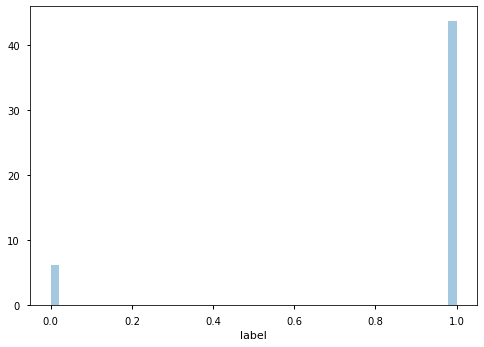

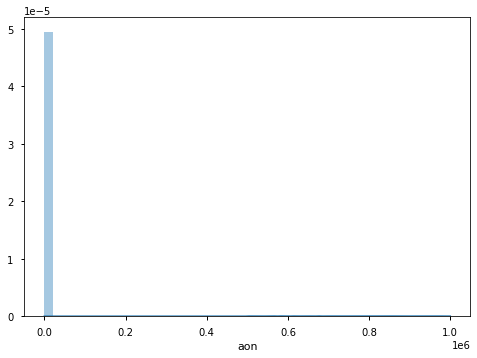

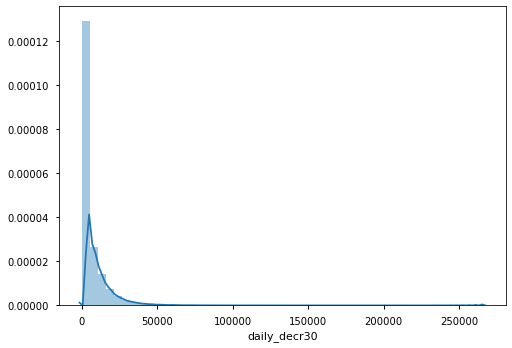

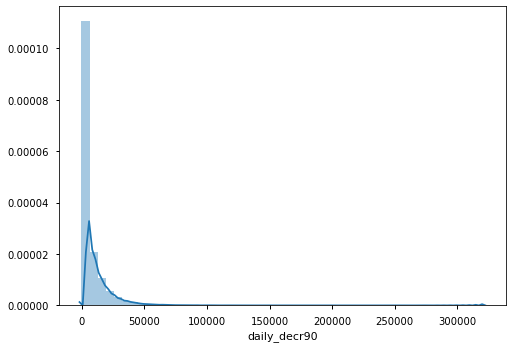

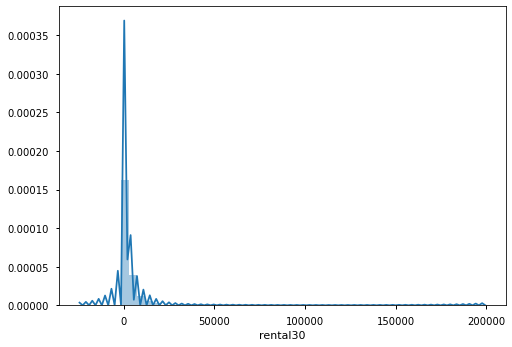

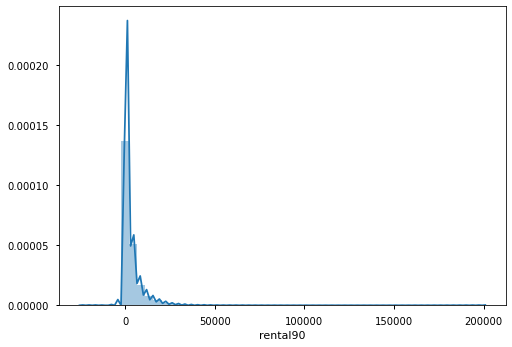

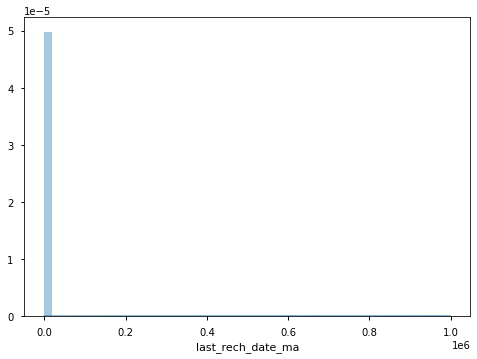

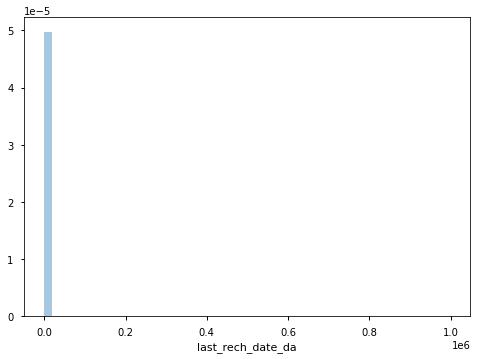

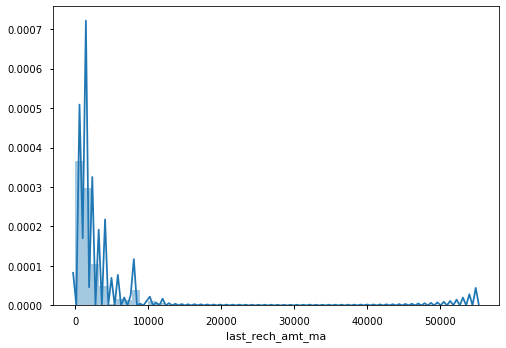

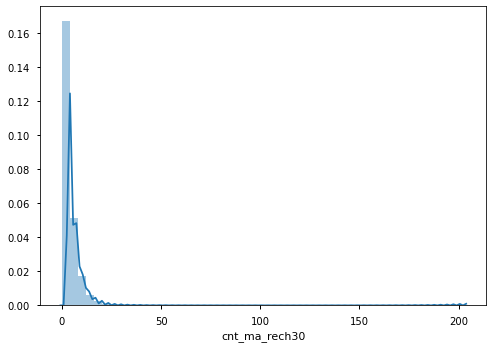

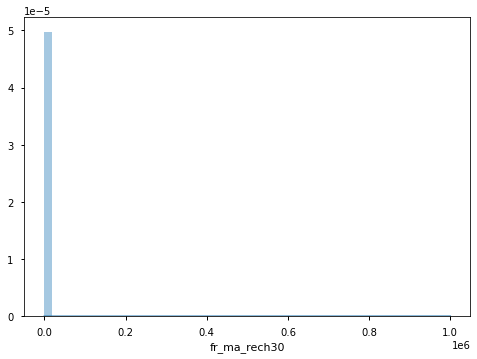

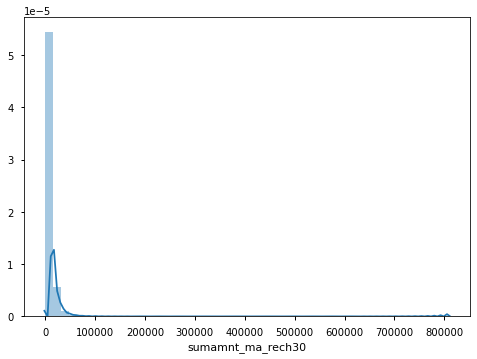

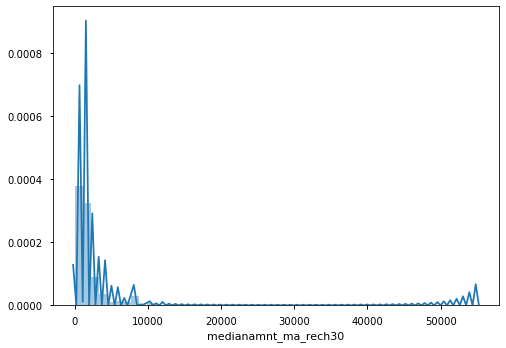

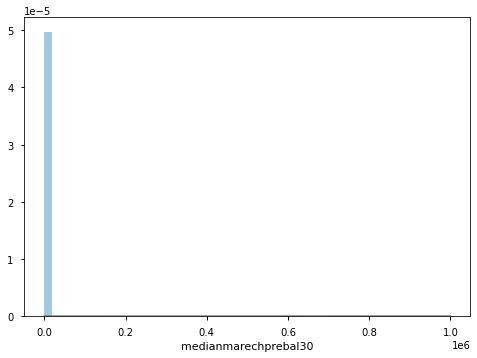

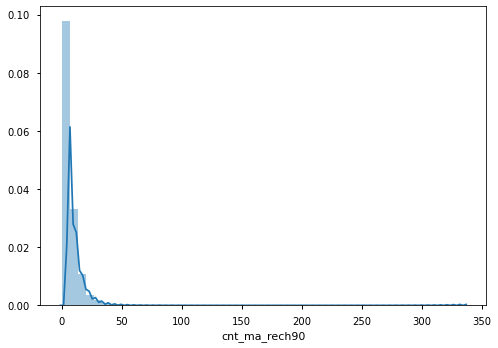

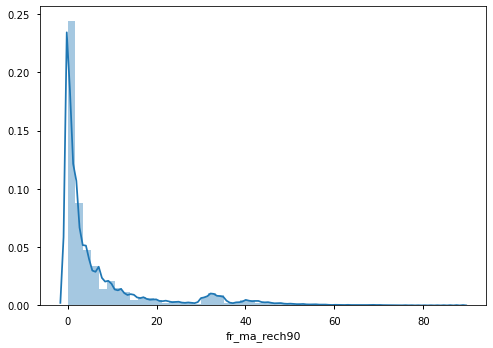

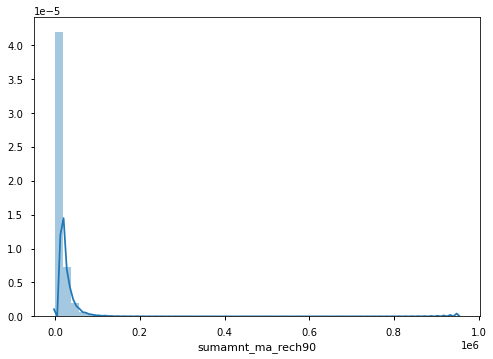

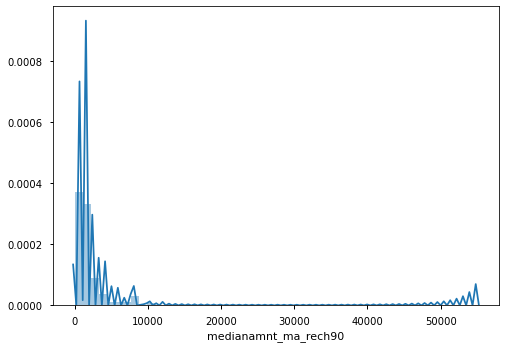

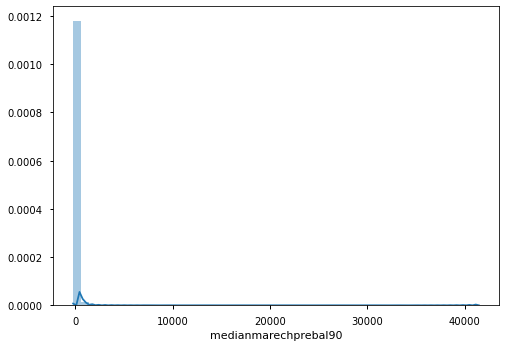

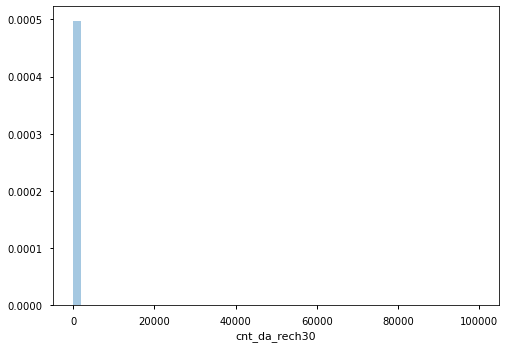

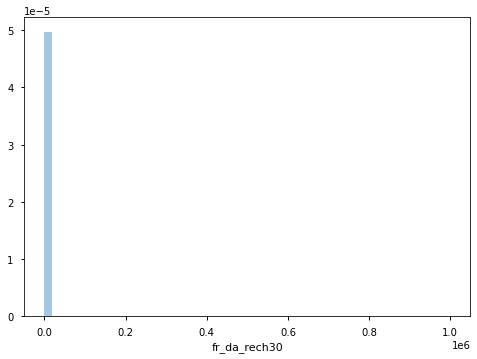

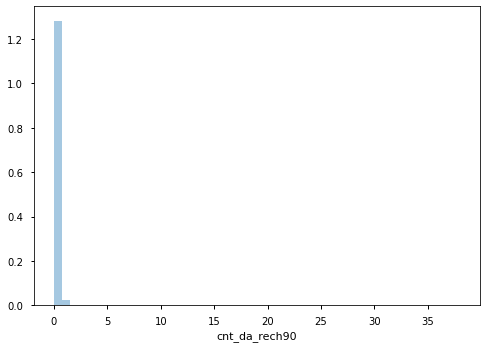

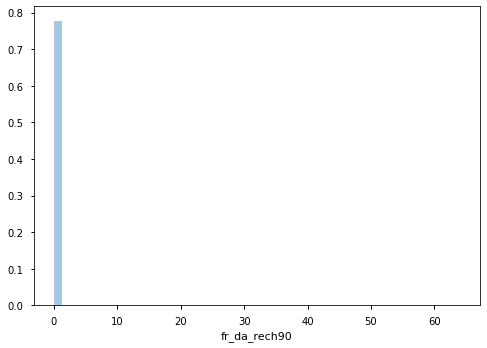

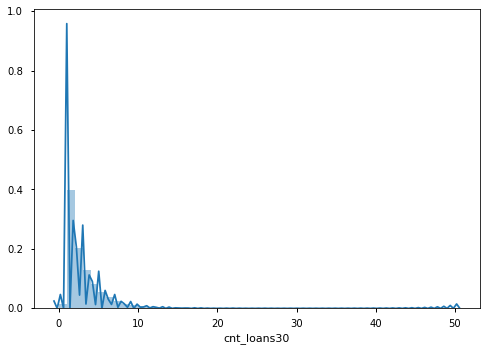

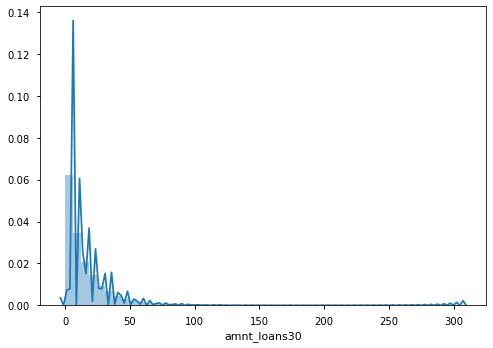

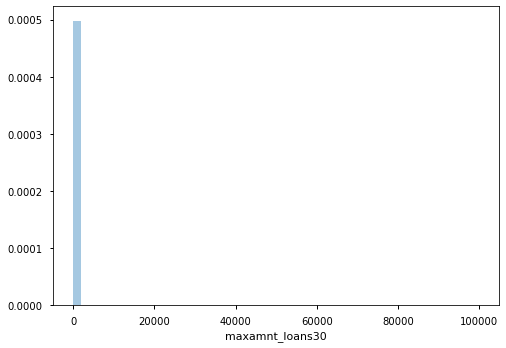

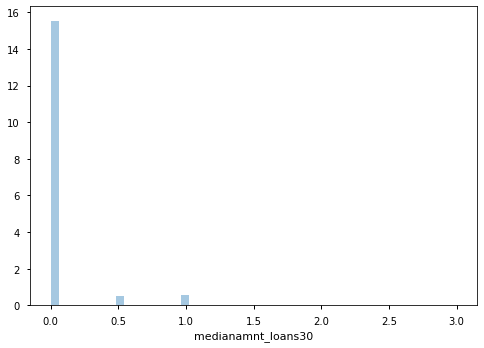

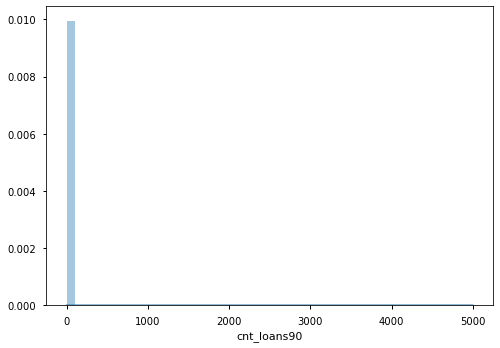

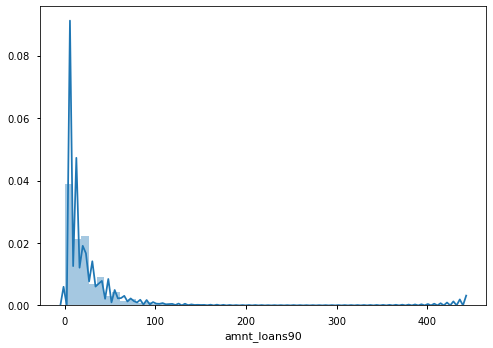

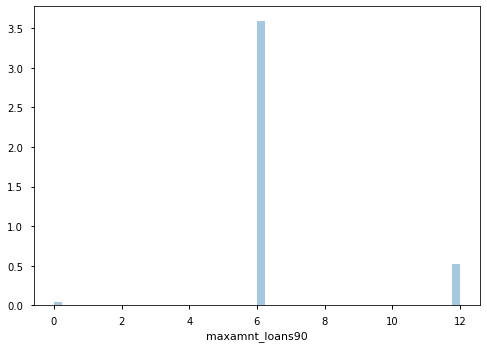

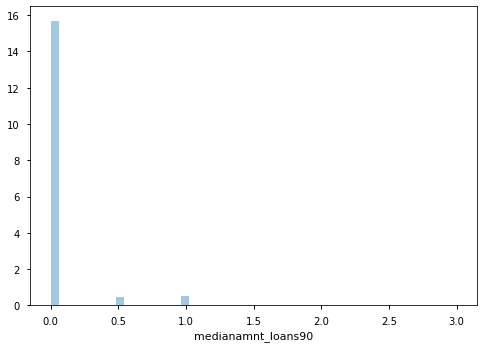

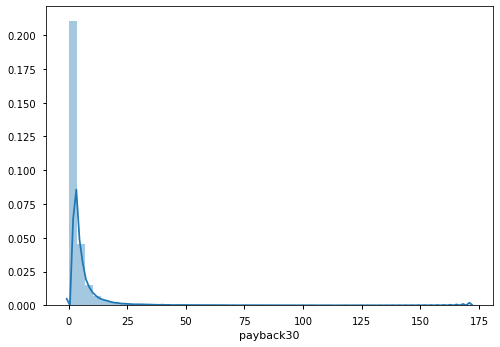

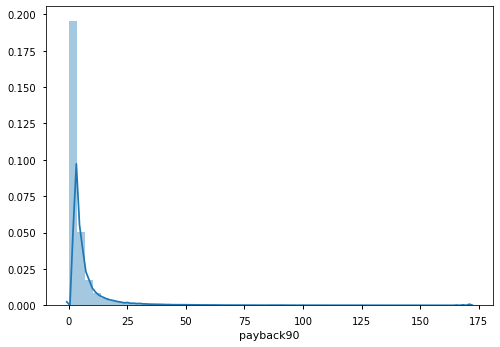

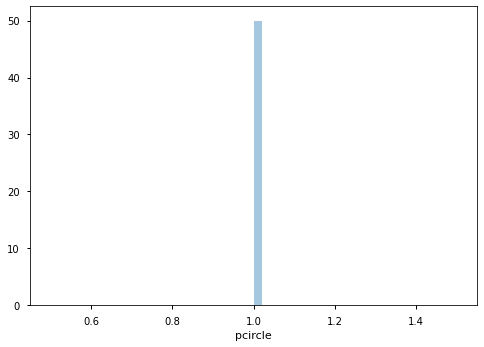

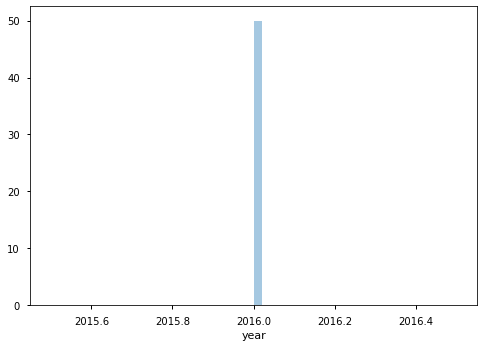

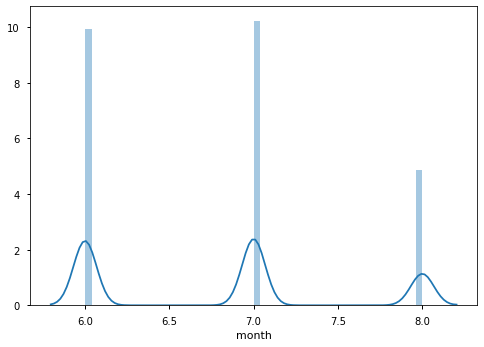

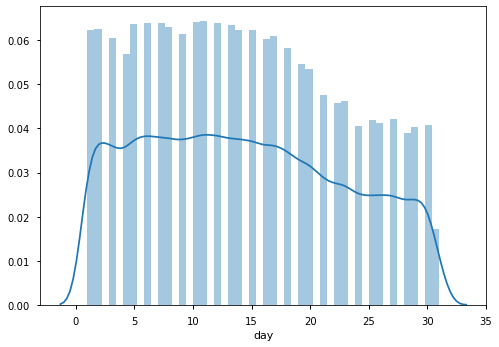

In [52]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

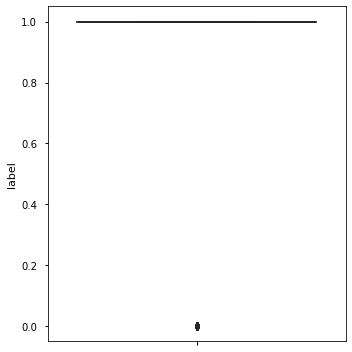

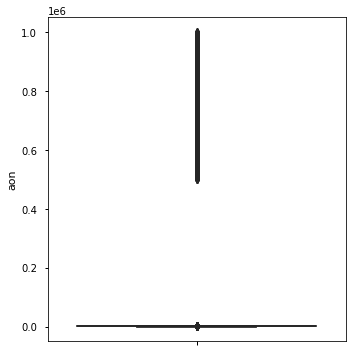

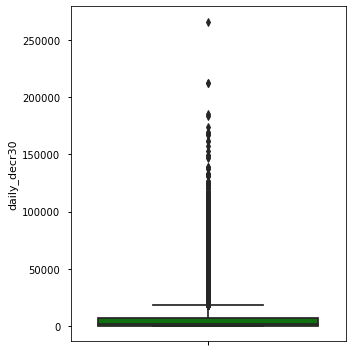

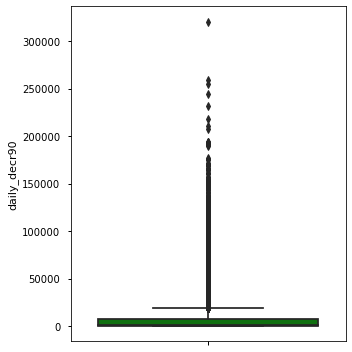

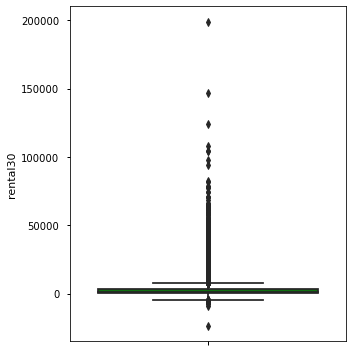

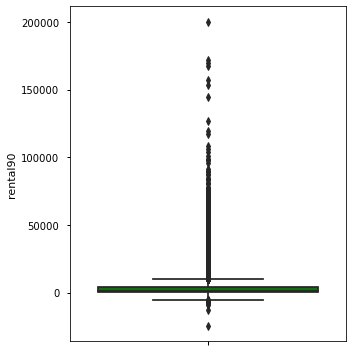

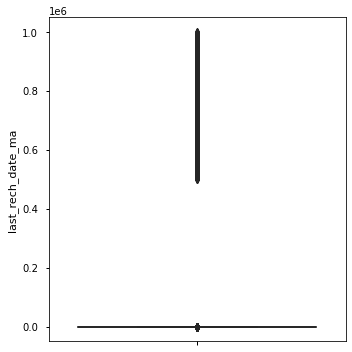

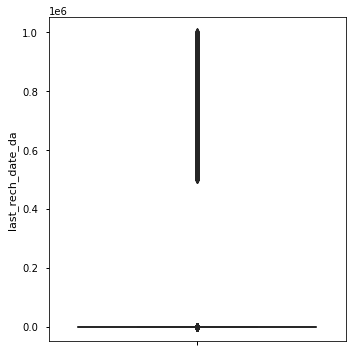

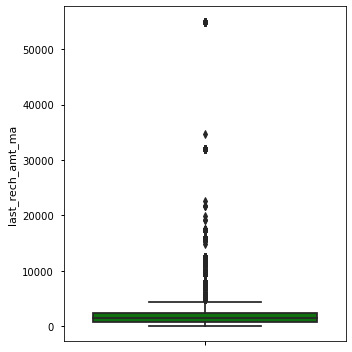

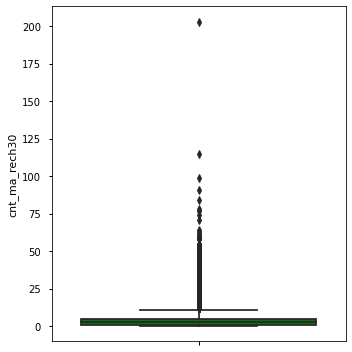

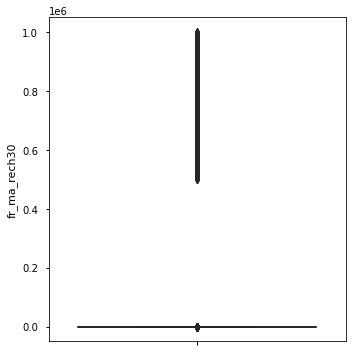

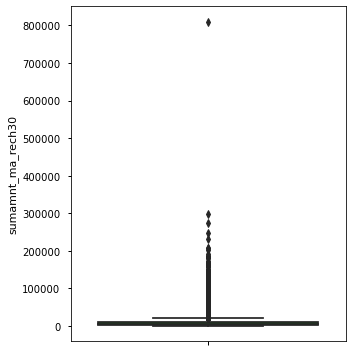

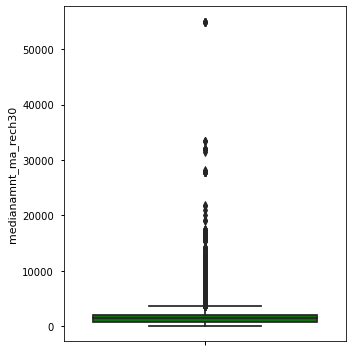

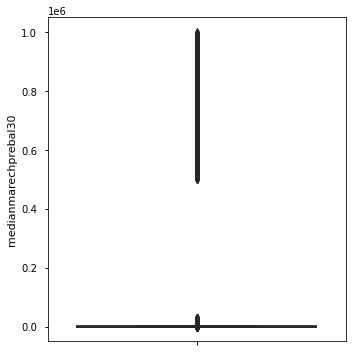

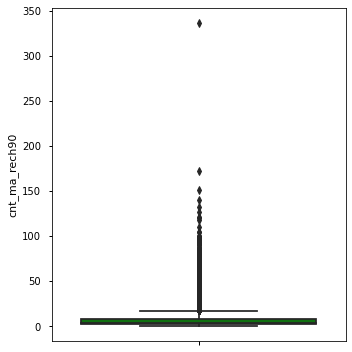

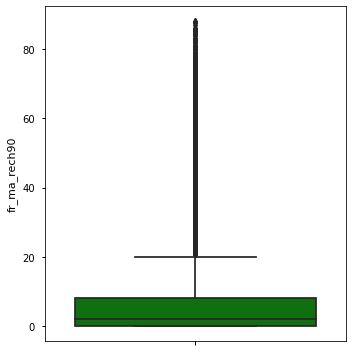

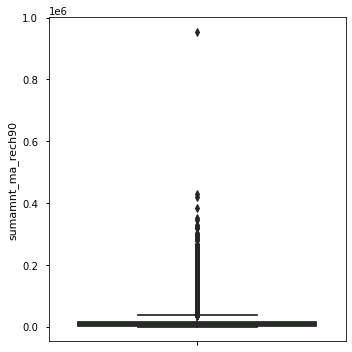

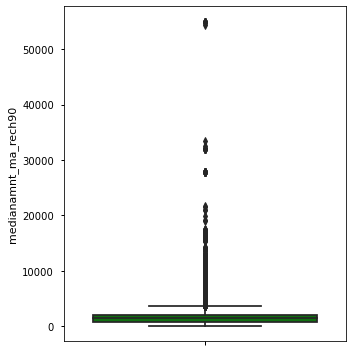

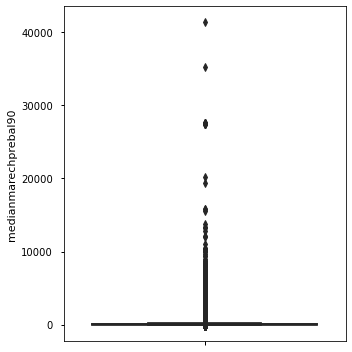

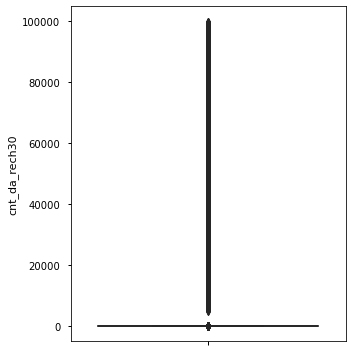

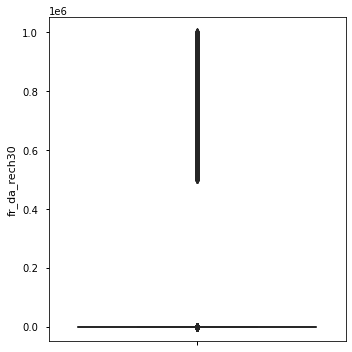

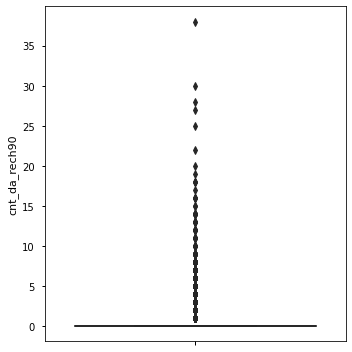

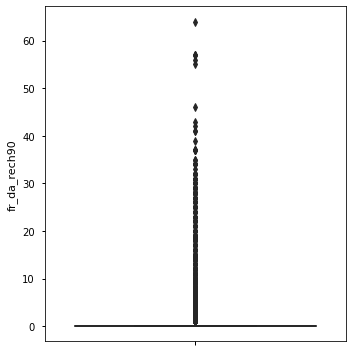

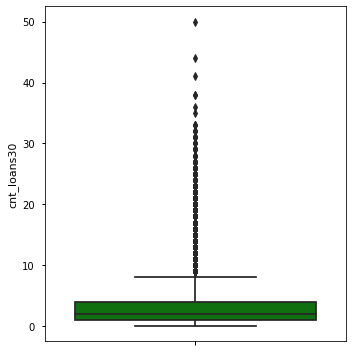

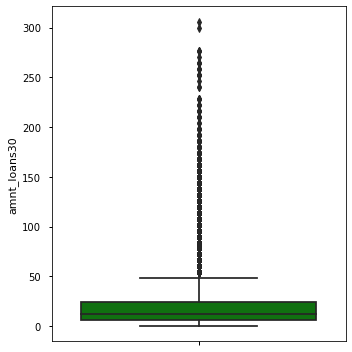

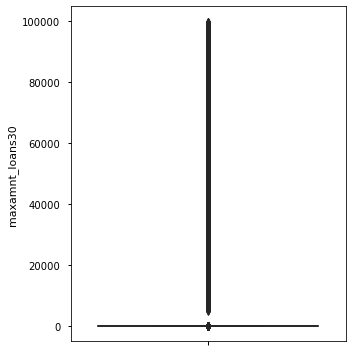

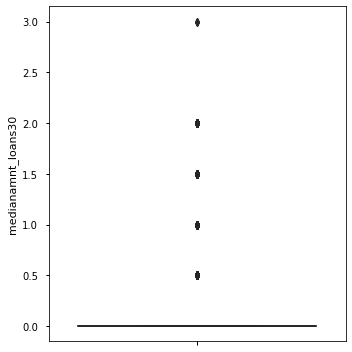

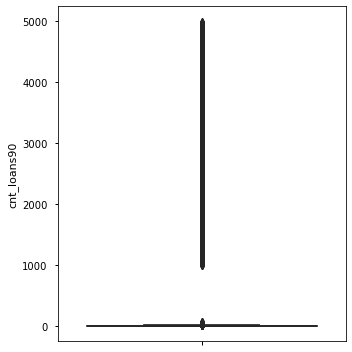

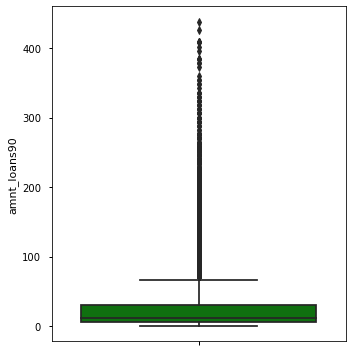

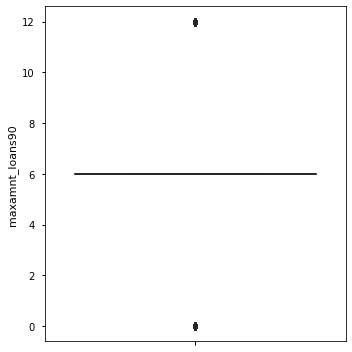

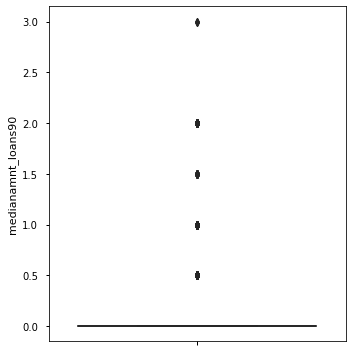

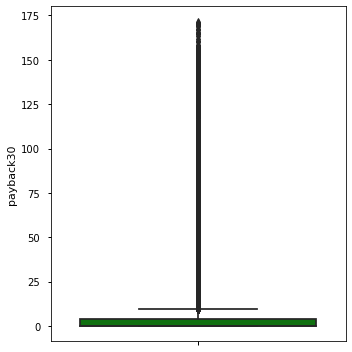

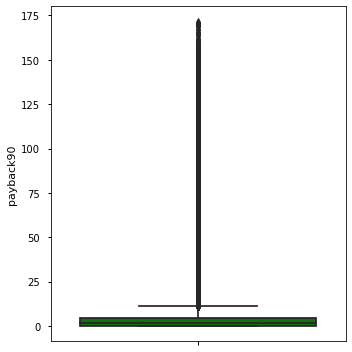

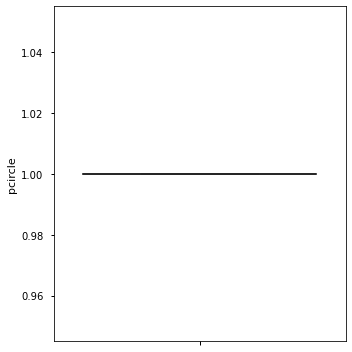

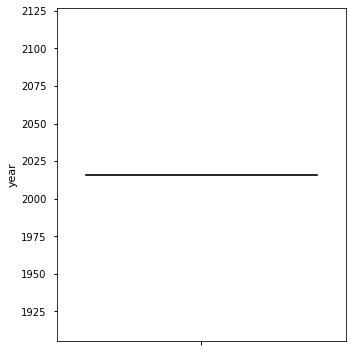

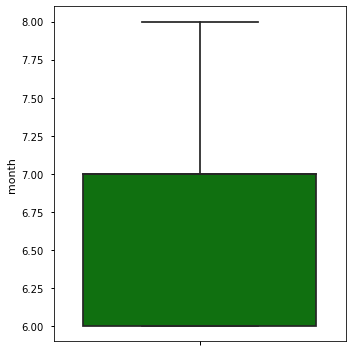

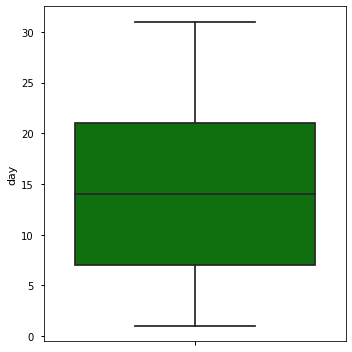

In [53]:
collist = df.columns
for i in range (0, len(collist)):
    plt.figure(figsize=(5,5))
    sb.boxplot(df[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

In [54]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [55]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
pcircle                    NaN       NaN           NaN           NaN   
year                       NaN       NaN           NaN           NaN   
month                 0.154949 -0.001863      0.518664      0.539410   
day                   0.006825  0.000662      0.006477     -0.021508   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.0011

In [56]:
#sb.pairplot(df)

In [57]:
df.drop(['day'],axis=1,inplace = True)

In [58]:
df.drop(['year'],axis=1,inplace = True)

In [59]:
df.drop(['month'],axis=1,inplace = True)

In [60]:
df.drop(['pcircle'],axis=1,inplace = True)

In [61]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0    0.0  272.0   3055.050000   3065.150000    220.13    260.13   
1    1.0  712.0  12122.000000  12124.750000   3691.26   3691.26   
2    1.0  535.0   1398.000000   1398.000000    900.13    900.13   
3    1.0  241.0     21.228000     21.228000    159.42    159.42   
4    1.0  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0            1539.0            2.0  ...   
1               20.0                0.0            5787.0            1.0  ...   
2                3.0                0.0            1539.0            1.0  ...   
3               41.0                0.0             947.0            0.0  ...   
4                4.0                0.0            2309.0            7.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0          2.0          12.0              6.0                 0.0   
1          1.0          12.0             12.0                 0.0   
2          1.0           6.0              6.0                 0.0   
3          2.0          12.0              6.0                 0.0   
4          7.0          42.0              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0          12.0              6.0                 0.0  29.000000   
1          1.0          12.0             12.0                 0.0   0.000000   
2          1.0           6.0              6.0                 0.0   0.000000   
3          2.0          12.0              6.0                 0.0   0.000000   
4          7.0          42.0              6.0                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

In [62]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [63]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [64]:
from scipy.stats import zscore

In [65]:
zscr=np.abs(zscore(df))
thereshold = 3
print(np.where(zscr>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [66]:
zscr[22][32]

3.6552396504837366

In [67]:
zscr[21][15]

4.4703916213001245

In [68]:
zscr[22][15]

4.629245062683489

In [69]:
zscr[209586][28]

3.6401714127890514

In [70]:
#df.shape
#dfnew=df[(zscr<3).all(axis=1)]
#dfnew.shape

In [71]:
#loss_per=(209593-161465)/209593*100
#loss_per

In [72]:
for i in df.columns:
    if df[i].skew()>0.5:
        df[i]=np.cbrt(df[i])
    if df[i].skew()<-0.5:
        df[i]=np.cbrt(df[i])
        
df.skew()

label                   -2.270254
aon                      8.740118
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       13.755535
last_rech_date_da       14.001042
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -1.894286
fr_ma_rech30            13.695845
sumamnt_ma_rech30       -0.213060
medianamnt_ma_rech30    -1.944025
medianmarechprebal30    11.578252
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -2.348905
medianmarechprebal90     0.509085
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.269101
amnt_loans30             0.345374
maxamnt_loans30         14.597061
medianamnt_loans30       3.558178
cnt_loans90             10.411644
amnt_loans90             0.747726
maxamnt_loans9

In [73]:
x=df.drop(columns=['label'])
y=df[['label']]

In [74]:
x.shape

(209593, 32)

In [75]:
y.shape

(209593, 1)

In [76]:
y.head()

label
0    0.0
1    1.0
2    1.0
3    1.0
4    1.0

In [77]:
x.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
0  6.479224     14.510179     14.526152   6.038000   6.383568   
1  8.929490     22.971610     22.973347  15.454616  15.454616   
2  8.118041     11.181560     11.181560   9.655359   9.655359   
3  6.223084      2.768873      2.768873   5.422267   5.422267   
4  9.820117      5.320595      5.320595  10.319359  10.319359   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           1.259921                0.0         11.545503       1.080060   
1           2.714418                0.0         17.953584       1.000000   
2           1.442250                0.0         11.545503       1.000000   
3           3.448217                0.0          9.820117       0.000000   
4           1.587401                0.0         13.217256       1.241366   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      2.758924  ...     1.259921      2.289428         1.817121   
1      0.000000  ...     1.000000      2.289428         2.289428   
2      0.000000  ...     1.000000      1.817121         1.817121   
3      0.000000  ...     1.259921      2.289428         1.817121   
4      1.259921  ...     1.912931      3.476027         1.817121   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     1.259921      2.289428         1.220285   
1                 0.0     1.000000      2.289428         1.317981   
2                 0.0     1.000000      1.817121         1.220285   
3                 0.0     1.259921      2.289428         1.220285   
4                 0.0     1.912931      3.476027         1.220285   

   medianamnt_loans90  payback30  payback90  
0                 0.0   3.072317   3.072317  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   1.326352   1.326352  

[5 rows x 32 columns]

In [78]:
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    accu=accuracy_score(y_test,predlr)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.8880527422957646 on RS: 81


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=81)

In [80]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predl=lg.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_test,predl))
print(confusion_matrix(y_test,predl))
print(classification_report(y_test,predl))

accuracy_score:
0.8880527422957646
[[ 1021  4605]
 [  557 39928]]
              precision    recall  f1-score   support

         0.0       0.65      0.18      0.28      5626
         1.0       0.90      0.99      0.94     40485

    accuracy                           0.89     46111
   macro avg       0.77      0.58      0.61     46111
weighted avg       0.87      0.89      0.86     46111



In [81]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.7514475938496238
[[ 4118  1508]
 [ 9953 30532]]
              precision    recall  f1-score   support

         0.0       0.29      0.73      0.42      5626
         1.0       0.95      0.75      0.84     40485

    accuracy                           0.75     46111
   macro avg       0.62      0.74      0.63     46111
weighted avg       0.87      0.75      0.79     46111



In [82]:
#sv=SVC()
#sv.fit(x_train,y_train)
#predsvc=sv.predict(x_test)
#print('accuracy_score:',)
#print(accuracy_score(y_test,predsvc))
#print(confusion_matrix(y_test,predsvc))
#print(classification_report(y_test,predsvc))

In [83]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy_score:
0.9144455769772939
[[ 2491  3135]
 [  810 39675]]
              precision    recall  f1-score   support

         0.0       0.75      0.44      0.56      5626
         1.0       0.93      0.98      0.95     40485

    accuracy                           0.91     46111
   macro avg       0.84      0.71      0.76     46111
weighted avg       0.91      0.91      0.90     46111



In [84]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.9066383292489861
[[ 1798  3828]
 [  477 40008]]
              precision    recall  f1-score   support

         0.0       0.79      0.32      0.46      5626
         1.0       0.91      0.99      0.95     40485

    accuracy                           0.91     46111
   macro avg       0.85      0.65      0.70     46111
weighted avg       0.90      0.91      0.89     46111



In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_gini=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
preddt=dt_gini.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt)) 

accuracy_score:
0.8674719698119755
[[ 2743  2883]
 [ 3228 37257]]
              precision    recall  f1-score   support

         0.0       0.46      0.49      0.47      5626
         1.0       0.93      0.92      0.92     40485

    accuracy                           0.87     46111
   macro avg       0.69      0.70      0.70     46111
weighted avg       0.87      0.87      0.87     46111



In [87]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.88387128 0.88232067 0.88322718 0.882461   0.8842502 ]
0.883226063175162


In [88]:
model=[rf,gnb,ad,lg,dt_gini]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

[0.91242635 0.91168682 0.91295117 0.91385562 0.91294909]
0.9127738104664422
[0.75309526 0.75068585 0.75204561 0.75394818 0.75449687]
0.7528543545650392
[0.90567523 0.90417233 0.904888   0.90483802 0.90502887]
0.9049204888803786
[0.88387128 0.88232067 0.88322718 0.882461   0.8842502 ]
0.883226063175162
[0.86836518 0.86774494 0.86898542 0.87120092 0.86905387]
0.869070064909865


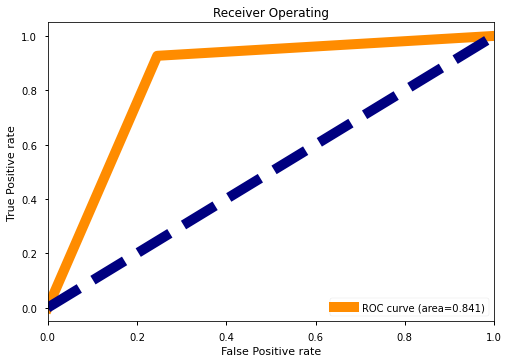

In [89]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(predrf,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(predrf,y_test)

0.8406946292845789

In [91]:
from sklearn.metrics import precision_recall_curve

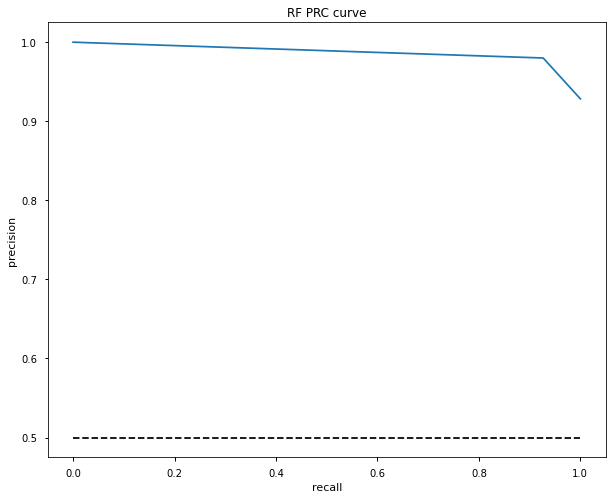

In [92]:
precision, recall, thresholds = precision_recall_curve(predrf,y_test,)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'rf')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('RF PRC curve')
plt.show()

In [93]:
import pickle
filename = 'Micro_credit.pkl'
pickle.dump(ad,open(filename,'wb'))

In [94]:
loaded_model = pickle.load(open('Micro_credit.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9066383292489861


In [95]:
y.shape

(209593, 1)

In [96]:
y_test.shape

(46111, 1)

In [97]:
y.head()

label
0    0.0
1    1.0
2    1.0
3    1.0
4    1.0

In [98]:
y_test['label'].value_counts()

1.0    40485
0.0     5626
Name: label, dtype: int64

In [99]:
# class count

class_cnt_1, class_cnt_0 =df['label'].value_counts()

#devided by class
df_class_1 = df[df['label']==1]
df_class_0 = df[df['label']==0]

In [100]:
class_cnt_1, class_cnt_0

(183431, 26162)

In [101]:
df_class_1.shape

(183431, 33)

In [102]:
df_class_0.shape

(26162, 33)

In [103]:
df_class_1.sample(2)

label        aon  daily_decr30  daily_decr90  rental30  rental90  \
56270    1.0  10.626586      1.662461      1.662461  3.815816  3.815816   
59140    1.0   5.406120     20.184624     20.199667  5.784082  5.506109   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
56270                0.0                0.0          0.000000       0.000000   
59140                1.0                0.0         15.937254       1.129831   

       ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
56270  ...      1.00000      1.817121         1.817121                 0.0   
59140  ...      1.44225      2.884499         2.289428                 0.0   

       cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
56270     1.000000      1.817121         1.220285                 0.0   
59140     1.587401      3.107233         1.317981                 0.0   

       payback30  payback90  
56270    0.00000    0.00000  
59140    1.44225    1.44225  

[2 rows x 33 columns]

In [104]:
df_class_1_under = df_class_1.sample(class_cnt_0)

df_test = pd.concat([df_class_1_under , df_class_0],axis=0)
print("Random Under Sampling")
print(df_test['label'].value_counts())

Random Under Sampling
0.0    26162
1.0    26162
Name: label, dtype: int64


In [105]:
x1=df_test.drop(columns=['label'])
y1=df_test[['label']]

In [106]:
x1.shape

(52324, 32)

In [107]:
y1.shape

(52324, 1)

In [ ]:
maxAccu1=0
maxRS1=0
for i in range (1,1000):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.22,random_state=i,stratify=y1)
    LR=LogisticRegression()
    LR.fit(x1_train,y1_train)
    predlr1=LR.predict(x1_test)
    accu1=accuracy_score(y1_test,predlr1)
    if accu1>maxAccu1:
        maxAccu1=accu1
        maxRS1=i
    
print("Best Accu is:",maxAccu1,"on RS:",maxRS1)

In [109]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.22,random_state=404)

In [110]:
lg1=LogisticRegression()
lg1.fit(x1_train,y1_train)
predlr1=lg1.predict(x1_test)
print('accuracy_score:')
print(accuracy_score(y1_test,predlr1))
print(confusion_matrix(y1_test,predlr1))
print(classification_report(y1_test,predlr1))

accuracy_score:
0.7636379430159833
[[4484 1314]
 [1407 4307]]
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77      5798
         1.0       0.77      0.75      0.76      5714

    accuracy                           0.76     11512
   macro avg       0.76      0.76      0.76     11512
weighted avg       0.76      0.76      0.76     11512



In [111]:
rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(x1_train,y1_train)
predrf1=rf1.predict(x1_test)
print('accuracy_score:',)
print(accuracy_score(y1_test,predrf1))
print(confusion_matrix(y1_test,predrf1))
print(classification_report(y1_test,predrf1))

accuracy_score:
0.8197533009034051
[[4616 1182]
 [ 893 4821]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      5798
         1.0       0.80      0.84      0.82      5714

    accuracy                           0.82     11512
   macro avg       0.82      0.82      0.82     11512
weighted avg       0.82      0.82      0.82     11512



In [116]:
gnb1=GaussianNB()
gnb1.fit(x1_train,y1_train)
predgnb1=gnb1.predict(x1_test)
print('accuracy_score:',)
print(accuracy_score(y1_test,predgnb1))
print(confusion_matrix(y1_test,predgnb1))
print(classification_report(y1_test,predgnb1))

accuracy_score:
0.7427032661570535
[[4477 1321]
 [1641 4073]]
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75      5798
         1.0       0.76      0.71      0.73      5714

    accuracy                           0.74     11512
   macro avg       0.74      0.74      0.74     11512
weighted avg       0.74      0.74      0.74     11512



In [117]:
ad1=AdaBoostClassifier(n_estimators=100)
ad1.fit(x1_train,y1_train)
predad1=ad1.predict(x1_test)
print('accuracy_score:',)
print(accuracy_score(y1_test,predad1))
print(confusion_matrix(y1_test,predad1))
print(classification_report(y1_test,predad1))

accuracy_score:
0.7973419041000694
[[4644 1154]
 [1179 4535]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      5798
         1.0       0.80      0.79      0.80      5714

    accuracy                           0.80     11512
   macro avg       0.80      0.80      0.80     11512
weighted avg       0.80      0.80      0.80     11512



In [118]:
dt_gini1=DecisionTreeClassifier(criterion='entropy')
dt_gini1.fit(x1_train,y1_train)
preddt1=dt_gini1.predict(x1_test)
print('accuracy_score:',)
print(accuracy_score(y1_test,preddt1))
print(confusion_matrix(y1_test,preddt1))
print(classification_report(y1_test,preddt1)) 

accuracy_score:
0.7445274496177902
[[4305 1493]
 [1448 4266]]
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75      5798
         1.0       0.74      0.75      0.74      5714

    accuracy                           0.74     11512
   macro avg       0.74      0.74      0.74     11512
weighted avg       0.74      0.74      0.74     11512



In [112]:
score=cross_val_score(rf1,x1,y1,cv=5)
print(score)
print(score.mean())

[0.81662685 0.81318681 0.8187291  0.81681796 0.81364679]
0.8158015030442234


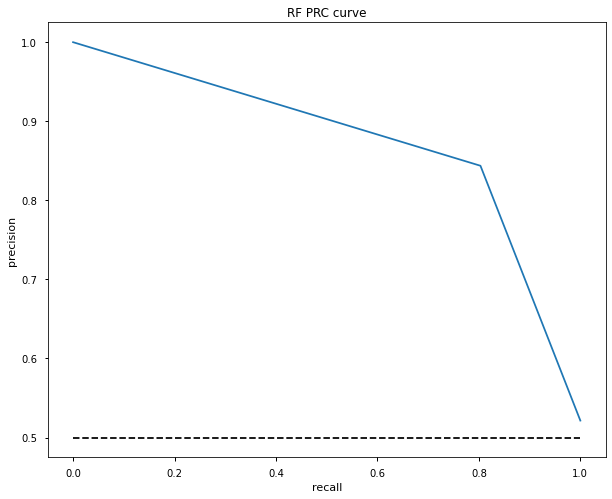

In [113]:
precision, recall, thresholds = precision_recall_curve(predrf1,y1_test,)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'rf1')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('RF PRC curve')
plt.show()

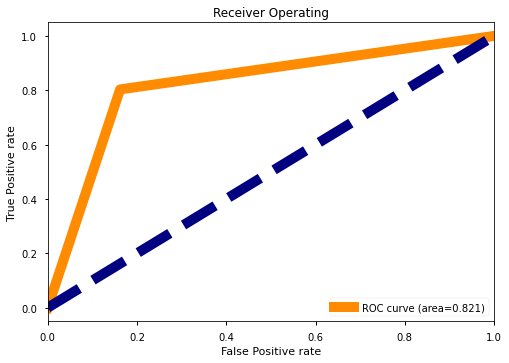

In [114]:
fpr,trp,thresholds =  roc_curve(predrf1,y1_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()